# Python 與資料科學應用

## 郭耀仁

## 課綱

- 靜態網頁擷取
- 為什麼我們要用模組？
- NumPy
- pandas
- matplotlib
- Scikit-Learn

## 靜態網頁擷取

### 事前準備：判斷資料擺放的位置

- Chrome 外掛：
  - [Quick JavaScript Switcher](https://chrome.google.com/webstore/detail/quick-javascript-switcher/geddoclleiomckbhadiaipdggiiccfje)
  - [JSONView](https://chrome.google.com/webstore/detail/jsonview/chklaanhfefbnpoihckbnefhakgolnmc) 
  - [Selector Gadget](https://chrome.google.com/webstore/detail/selectorgadget/mhjhnkcfbdhnjickkkdbjoemdmbfginb)
  - [EditThisCookie](https://chrome.google.com/webstore/detail/editthiscookie/fngmhnnpilhplaeedifhccceomclgfbg)

- 擺放在 JSON data api 的範例網頁：
  - <https://ecshweb.pchome.com.tw/search/v3.3/?q=macbook)>
  - <https://www.nba.com/lakers/roster>
- 擺放在 HTML 的範例網頁：
  - <https://tw.stock.yahoo.com/d/i/rank.php?t=pri&e=tse&n=100>
  - <https://www.imdb.com/title/tt1477834>

### `requests` 模組

<http://docs.python-requests.org/en/master/>

```python
r = requests.get('https://api.github.com/user', auth=('user', 'pass'))
r.status_code
## 200
r.headers['content-type']
## 'application/json; charset=utf8'
r.encoding
## 'utf-8'
r.text
## u'{"type":"User"...'
r.json()
## {u'private_gists': 419, u'total_private_repos': 77, ...}
```

In [0]:
# pchome data json
import requests # from requests import get

pchome_data_url = "https://ecshweb.pchome.com.tw/search/v3.3/all/results?q=macbook)&page=1&sort=sale/dc"
response = requests.get(pchome_data_url)

In [0]:
json_str = response.text
json_dict = response.json()
print(type(json_str))
print(type(json_dict))
print(json_str)
print(len(json_str))
print(json_dict)

<class 'str'>
<class 'dict'>
{"QTime":64,"totalRows":13413,"totalPage":100,"range":{"min":"","max":""},"cateName":"","q":"macbook)","subq":"","token":["macbook"],"prods":[{"Id":"DYAJBL-A90097XCB","cateId":"DYAJBG","picS":"\/items\/DYAJBLA90097XCB\/000002_1544666864.jpg","picB":"\/items\/DYAJBLA90097XCB\/000001_1548381756.jpg","name":"MacBook Air 13-inch: 1.8GHz dual-core Intel Core i5, 128GB (MQD32TA\/A)","describe":"2017 MacBook Air 13\u7b2c\u4e94\u4ee3 i5 \/ 8GB \/ 128GB \/ 1.8GHz dual\\r\\n\u9650\u6642\u512a\u60e0\u2605\u7acb\u5373\u77013\u5343\u81f31 31(\u56db)10:00\u6b62 \r\n\u6578\u91cf\u6709\u9650\uff0c\u552e\u5b8c\u70ba\u6b62\r\n\u7db2\u8def\u50f9$31900\uff0e\u9650\u6642\u50f9\u2198$\uff12\uff18\uff19\uff10\uff10\r\n\r\n\u25cf intel core  i5 \u8655\u7406\u5668\r\n\u25cf intel hd graphics 6000\r\n\u25cf ssd \u5132\u5b58\u88dd\u7f6e\r\n\u25cf \u9577\u9054 12 \u5c0f\u6642\u96fb\u6c60\u7e8c\u822a\u529b\r\n\u25cf 802.11 ac wi-fi\r\n\u25cf multi - touch \u89f8\u63a7\u5f0f\u8ecc\u8de1

In [0]:
print(json_dict.keys())
print(len(json_dict.keys()))

dict_keys(['QTime', 'totalRows', 'totalPage', 'range', 'cateName', 'q', 'subq', 'token', 'prods'])
9


In [0]:
# 求 json_dict["prods"] 的長度為何？（有幾個 prods）
prods_len = len(json_dict["prods"])
print("這個頁面有 {} 個產品".format(prods_len))
# 回傳我最高價與最低價分別為多少？max(), min()
#json_dict["prods"][0]["price"]
#json_dict["prods"][1]["price"]
#...
#json_dict["prods"][__]["price"]
# for loop
prod_prices = []
for i in range(prods_len):
  prod_prices.append(json_dict["prods"][i]["price"])
# 或者採用 list comprehension
#prod_prices = [json_dict["prods"][i]["price"] for i in range(prods_len)]
print(prod_prices)
print("產品的最高價：{}".format(max(prod_prices)))
print("產品的最低價：{}".format(min(prod_prices)))
# （Optional）平均價格為多少？
print("平均的價格為：{}".format(sum(prod_prices) / prods_len))

這個頁面有 20 個產品
[28900, 36900, 39900, 1790, 44900, 38900, 42900, 36900, 2290, 54900, 54900, 42900, 38900, 39900, 51699, 29900, 51530, 74900, 2490, 85405]
產品的最高價：85405
產品的最低價：1790
平均的價格為：40040.2


In [0]:
import numpy as np

prod_prices_arr = np.array(prod_prices)
print(prod_prices_arr.mean())
print(prod_prices_arr.mean())
print(np.median(prod_prices_arr))
print(prod_prices_arr.std())

40040.2
40040.2
39900.0
20700.45591913376


In [0]:
import requests

lakers_roster_url = "https://data.nba.com/data/10s/v2015/json/mobile_teams/nba/2018/teams/lakers/player_averages_02.json"
response = requests.get(lakers_roster_url)

In [0]:
json_dict = response.json()
num_of_players = len(json_dict["tpsts"]["pl"])
print("洛杉磯湖人隊有 {} 個球員".format(num_of_players))
#json_dict["tpsts"]["pl"][0]["fn"] + " " + json_dict["tpsts"]["pl"][0]["ln"]
lakers_roster = []
for i in range(num_of_players):
  player_name = "{} {}".format(json_dict["tpsts"]["pl"][i]["fn"], json_dict["tpsts"]["pl"][i]["ln"])
  lakers_roster.append(player_name)
# list comprehension
#lakers_roster = ["{} {}".format(json_dict["tpsts"]["pl"][i]["fn"], json_dict["tpsts"]["pl"][i]["ln"]) for i in range(num_of_players)]
print(lakers_roster)
# ["Tyson Chandler", "LeBron James", "Rajon Rondo", ...]

洛杉磯湖人隊有 17 個球員
['Tyson Chandler', 'LeBron James', 'Rajon Rondo', 'Michael Beasley', 'JaVale McGee', 'Lance Stephenson', 'Kentavious Caldwell-Pope', 'Brandon Ingram', 'Ivica Zubac', 'Alex Caruso', 'Lonzo Ball', 'Kyle Kuzma', 'Josh Hart', 'Svi Mykhailiuk', 'Moritz Wagner', 'Isaac Bonga', 'Johnathan Williams']


### PyQuery 模組

<https://pythonhosted.org/pyquery/>

```python
from pyquery import PyQuery as pq

d = pq(filename=path_to_html_file)
d("#hello")
## [<p#hello.hello>]
p = d("#hello")
print(p.html())
## Hello world !
p.html("you know <a href='http://python.org/'>Python</a> rocks")
## [<p#hello.hello>]
print(p.html())
## you know <a href="http://python.org/">Python</a> rocks
print(p.text())
## you know Python rocks
```

- 使用 CSS Selector 來進行資料位置的指定：[Selector Gadget](https://chrome.google.com/webstore/detail/selectorgadget/mhjhnkcfbdhnjickkkdbjoemdmbfginb)

In [0]:
import requests

yahoo_stock_url = "https://tw.stock.yahoo.com/d/i/rank.php?t=pri&e=tse&n=100"
response = requests.get(yahoo_stock_url)

In [0]:
response.json()

JSONDecodeError: ignored

In [0]:
len(response.text)

59162

In [0]:
!pip install pyquery

In [0]:
from pyquery import PyQuery as pq

#html_file = response.text
yahoo_stock_url = "https://tw.stock.yahoo.com/d/i/rank.php?t=pri&e=tse&n=100"
doc = pq(yahoo_stock_url)
print(type(doc))

<class 'pyquery.pyquery.PyQuery'>


In [0]:
for e in doc(".name a"):
  print(e.text)

3008 大立光
5269 祥碩
6409 旭隼
6415 矽力-KY
1590 亞德客-KY
1476 儒鴻
2059 川湖
2912 統一超
2327 國巨
2207 和泰車
4137 麗豐-KY
2231 為升
8464 億豐
6414 樺漢
2454 聯發科
8341 日友
2049 上銀
2474 可成
2227 裕日車
8454 富邦媒
2395 研華
2357 華碩
3406 玉晶光
2330 台積電
2723 美食-KY
3533 嘉澤
1707 葡萄王
3443 創意
9910 豐泰
1477 聚陽
3665 貿聯-KY
2492 華新科
6452 康友-KY
8422 可寧衛
6666 羅麗芬-KY
2379 瑞昱
6504 南六
3034 聯詠
1537 廣隆
1256 鮮活果汁-KY
2439 美律
3130 一零四
9921 巨大
2308 台達電
6670 復盛應用
4912 聯德控股-KY
9914 美利達
3413 京鼎
1558 伸興
2707 晶華
8482 商億-KY
1723 中碳
6230 超眾
8480 泰昇-KY
4536 拓凱
8070 長華
4763 材料-KY
4551 智伸科
2239 英利-KY
5288 豐祥-KY
2360 致茂
3532 台勝科
1536 和大
4438 廣越
4943 康控-KY
4766 南寶
4190 佐登-KY
5871 中租-KY
6464 台數科
3026 禾伸堂
6271 同欣電
8016 矽創
3045 台灣大
6505 台塑化
2412 中華電
8114 振樺電
6456 GIS-KY
1326 台化
6552 易華電
1760 寶齡富錦
2345 智邦
6533 晶心科
1301 台塑
3454 晶睿
6581 鋼聯
2939 凱羿-KY
9941 裕融
1232 大統益
5234 達興材料
2404 漢唐
4739 康普
3708 上緯投控
2496 卓越
6277 宏正
8499 鼎炫-KY
6416 瑞祺電通
3530 晶相光
2373 震旦行
3376 新日興
2731 雄獅


In [0]:
from pyquery import PyQuery as pq

yahoo_stock_url = "https://tw.stock.yahoo.com/d/i/rank.php?t=pri&e=tse&n=100"
doc = pq(yahoo_stock_url)

In [0]:
ticker_company_css = ".name a"
price_css = ".name+ td"
ticker_company = [e.text for e in doc(ticker_company_css)]
print(ticker_company)

['3008 大立光', '5269 祥碩', '6409 旭隼', '6415 矽力-KY', '1590 亞德客-KY', '1476 儒鴻', '2059 川湖', '2912 統一超', '2327 國巨', '2207 和泰車', '4137 麗豐-KY', '2231 為升', '8464 億豐', '6414 樺漢', '2454 聯發科', '8341 日友', '2049 上銀', '2474 可成', '2227 裕日車', '8454 富邦媒', '2395 研華', '2357 華碩', '3406 玉晶光', '2330 台積電', '2723 美食-KY', '3533 嘉澤', '1707 葡萄王', '3443 創意', '9910 豐泰', '1477 聚陽', '3665 貿聯-KY', '2492 華新科', '6452 康友-KY', '8422 可寧衛', '6666 羅麗芬-KY', '2379 瑞昱', '6504 南六', '3034 聯詠', '1537 廣隆', '1256 鮮活果汁-KY', '2439 美律', '3130 一零四', '9921 巨大', '2308 台達電', '6670 復盛應用', '4912 聯德控股-KY', '9914 美利達', '3413 京鼎', '1558 伸興', '2707 晶華', '8482 商億-KY', '1723 中碳', '6230 超眾', '8480 泰昇-KY', '4536 拓凱', '8070 長華', '4763 材料-KY', '4551 智伸科', '2239 英利-KY', '5288 豐祥-KY', '2360 致茂', '3532 台勝科', '1536 和大', '4438 廣越', '4943 康控-KY', '4766 南寶', '4190 佐登-KY', '5871 中租-KY', '6464 台數科', '3026 禾伸堂', '6271 同欣電', '8016 矽創', '3045 台灣大', '6505 台塑化', '2412 中華電', '8114 振樺電', '6456 GIS-KY', '1326 台化', '6552 易華電', '1760 寶齡富錦', '2345 智邦', '6533 晶心科', '1301 台

In [0]:
price = [float(e.text) for e in doc(price_css)]
print(price)

[3780.0, 553.0, 531.0, 443.5, 361.0, 345.0, 340.0, 323.0, 321.0, 290.0, 283.5, 273.0, 262.0, 249.0, 245.5, 245.0, 243.0, 230.5, 229.5, 226.0, 226.0, 226.0, 225.5, 222.5, 210.5, 210.0, 210.0, 202.0, 190.5, 186.5, 181.0, 171.5, 170.5, 170.0, 168.5, 160.0, 158.5, 157.0, 157.0, 155.0, 155.0, 155.0, 152.0, 149.0, 148.5, 148.0, 148.0, 141.0, 138.5, 137.0, 136.0, 135.5, 135.5, 134.0, 132.0, 131.0, 130.0, 129.0, 125.0, 123.0, 121.5, 120.5, 119.5, 117.0, 116.5, 114.5, 114.0, 112.0, 112.0, 110.5, 110.0, 110.0, 109.0, 108.5, 107.0, 106.5, 106.5, 106.0, 105.5, 105.0, 104.0, 101.0, 101.0, 101.0, 100.0, 100.0, 99.8, 99.7, 94.9, 94.3, 93.8, 93.3, 92.9, 92.5, 92.3, 91.6, 90.8, 89.5, 88.9, 87.3]


In [0]:
# 將 ticker_company 拆開成 ticker / company 兩個 list
# str.split()
ticker = [i.split()[0] for i in ticker_company]
company = [i.split()[1] for i in ticker_company]
print(ticker)
print(company)
# 將 -KY 的資料挑出來 ticker_ky / company_ky / price_ky
# in
ticker_ky, company_ky, price_ky = [], [], []
for i in range(len(company)):
  if "KY" in company[i]:
    ticker_ky.append(ticker[i])
    company_ky.append(company[i])
    price_ky.append(price[i])
    
print(ticker_ky)
print(company_ky)
print(price_ky)

['3008', '5269', '6409', '6415', '1590', '1476', '2059', '2912', '2327', '2207', '4137', '2231', '8464', '6414', '2454', '8341', '2049', '2474', '2227', '8454', '2395', '2357', '3406', '2330', '2723', '3533', '1707', '3443', '9910', '1477', '3665', '2492', '6452', '8422', '6666', '2379', '6504', '3034', '1537', '1256', '2439', '3130', '9921', '2308', '6670', '4912', '9914', '3413', '1558', '2707', '8482', '1723', '6230', '8480', '4536', '8070', '4763', '4551', '2239', '5288', '2360', '3532', '1536', '4438', '4943', '4766', '4190', '5871', '6464', '3026', '6271', '8016', '3045', '6505', '2412', '8114', '6456', '1326', '6552', '1760', '2345', '6533', '1301', '3454', '6581', '2939', '9941', '1232', '5234', '2404', '4739', '3708', '2496', '6277', '8499', '6416', '3530', '2373', '3376', '2731']
['大立光', '祥碩', '旭隼', '矽力-KY', '亞德客-KY', '儒鴻', '川湖', '統一超', '國巨', '和泰車', '麗豐-KY', '為升', '億豐', '樺漢', '聯發科', '日友', '上銀', '可成', '裕日車', '富邦媒', '研華', '華碩', '玉晶光', '台積電', '美食-KY', '嘉澤', '葡萄王', '創意', '豐泰', '聚

In [0]:
from pyquery import PyQuery as pq

movie_url = "https://www.imdb.com/title/tt4779682"
doc = pq(movie_url)

In [0]:
rating_css = "strong span"
time_css = "time"
cast_css = ".primary_photo+ td a"
rating = float(doc(rating_css).text())
movie_time = [e.text() for e in doc(time_css).items()]
cast = [e.text() for e in doc(cast_css).items()]
movie_dict = {
    'The Meg': {
        "rating": rating,
        "movieTime": movie_time,
        "cast": cast
    }
}
for k in movie_dict.keys():
  for v in movie_dict[k].values():
    print(v)

5.7
['1h 53min', '113 min']
['Jason Statham', 'Bingbing Li', 'Rainn Wilson', 'Cliff Curtis', 'Winston Chao', 'Shuya Sophia Cai', 'Ruby Rose', 'Page Kennedy', 'Robert Taylor', 'Ólafur Darri Ólafsson', 'Jessica McNamee', 'Masi Oka', 'Raymond Vinten', 'Hongmei Mai', 'Wei Yi']


In [0]:
def get_movie_info(movie_url):
  doc = pq(movie_url)
  rating_css = "strong span"
  time_css = "time"
  cast_css = ".primary_photo+ td a"
  rating = float(doc(rating_css).text())
  movie_time = [e.text() for e in doc(time_css).items()]
  cast = [e.text() for e in doc(cast_css).items()]
  movie_dict = {
      "rating": rating,
      "movieTime": movie_time,
      "cast": cast
  }
  return movie_dict

In [0]:
get_movie_info("https://www.imdb.com/title/tt7349662")

{'cast': ['Alec Baldwin',
  'John David Washington',
  'Isiah Whitlock Jr.',
  'Robert John Burke',
  'Brian Tarantina',
  'Arthur J. Nascarella',
  'Ken Garito',
  'Frederick Weller',
  'Adam Driver',
  'Michael Buscemi',
  'Laura Harrier',
  'Damaris Lewis',
  'Ato Blankson-Wood',
  'Corey Hawkins',
  'Dared Wright'],
 'movieTime': ['2h 15min', '135 min'],
 'rating': 7.5}

In [0]:
get_movie_info("https://www.imdb.com/title/tt6628394")

{'cast': ['Jeff Bridges',
  'Cynthia Erivo',
  'Dakota Johnson',
  'Jon Hamm',
  'Chris Hemsworth',
  'Cailee Spaeny',
  'Lewis Pullman',
  'Nick Offerman',
  'Xavier Dolan',
  'Shea Whigham',
  "Mark O'Brien",
  'Charles Halford',
  "Jim O'Heir",
  'Gerry Nairn',
  'Alvina August'],
 'movieTime': ['2h 21min', '141 min'],
 'rating': 7.2}

In [0]:
from urllib.parse import quote_plus

movie_title = "la la land"
query_str = quote_plus(movie_title)
query_result_url = "https://www.imdb.com/find?q={}&s=tt&ttype=ft&ref_=fn_ft".format(query_str)
print(query_result_url)

https://www.imdb.com/find?q=la+la+land&s=tt&ttype=ft&ref_=fn_ft


In [0]:
doc = pq(query_result_url)
href = doc(".odd:nth-child(1) .result_text a").attr("href")
movie_url = "https://www.imdb.com" + href
print(movie_url)
get_movie_info(movie_url)

https://www.imdb.com/title/tt3783958/?ref_=fn_ft_tt_1


{'cast': ['Ryan Gosling',
  'Emma Stone',
  'Amiée Conn',
  'Terry Walters',
  'Thom Shelton',
  'Cinda Adams',
  'Callie Hernandez',
  'Jessica Rothe',
  'Sonoya Mizuno',
  'Rosemarie DeWitt',
  'J.K. Simmons',
  'Claudine Claudio',
  'Jason Fuchs',
  'D.A. Wallach',
  'Trevor Lissauer'],
 'movieTime': ['2h 8min', '128 min'],
 'rating': 8.0}

In [0]:
p = pq('<p id="hello" class="world" href="movie_url"></p>')('p')
p.attr("href")

'movie_url'

In [0]:
import datetime

print(datetime.datetime.now())

2019-01-30 06:15:22.380797


In [0]:
!pip install pyquery

In [0]:
from pyquery import PyQuery as pq

china_airline_movie_url = "http://www.fantasy-sky.com/ContentList.aspx?section=002"
doc = pq(china_airline_movie_url)
print(doc(".movies-name"))

<h4 class="movies-name">黑色黨徒</h4>&#13;
                            <h4 class="movies-name">壞事大飯店</h4>&#13;
                            <h4 class="movies-name">滴答屋</h4>&#13;
                            <h4 class="movies-name">聖誕頌歌</h4>&#13;
                            <h4 class="movies-name">拳力逃脫</h4>&#13;
                            <h4 class="movies-name">猛毒</h4>&#13;
                            <h4 class="movies-name">血薄荷</h4>&#13;
                            <h4 class="movies-name">小腳怪</h4>&#13;
                            <h4 class="movies-name">摯友維尼</h4>&#13;
                            <h4 class="movies-name">惡魔島</h4>&#13;
                            <h4 class="movies-name">人肉搜索</h4>&#13;
                            <h4 class="movies-name">終極戰士：掠奪者</h4>&#13;
                            <h4 class="movies-name">巨齒鯊</h4>&#13;
                            <h4 class="movies-name">紅盒子</h4>&#13;
                            <h4 class="movies-name">黃金兄弟</h4>&#13;
                          

請同學找出華航機上電影的 Top 5 IMDB rating 電影名稱、評等

In [0]:
import requests
from pyquery import PyQuery as pq

def get_movie_titles_from_ci():
  lang_cookies = {
      "COOKIE_LANGUAGE": "en"
  }
  china_airline_movie_url = "http://www.fantasy-sky.com/ContentList.aspx?section=002&category=0020"
  movie_title_urls = [china_airline_movie_url + str(i) for i in range(1, 5)]
  all_movie_titles = []
  for mtu in movie_title_urls:
    response = requests.get(mtu, cookies=lang_cookies)
    doc_str = response.text
    doc = pq(doc_str)
    movie_titles = [e.text() for e in doc(".movies-name").items()]
    all_movie_titles += movie_titles
  return all_movie_titles

In [0]:
from urllib.parse import quote_plus

def get_movie_url(movie_title):
  query_str = quote_plus(movie_title)
  query_result_url = "https://www.imdb.com/find?q={}&s=tt&ttype=ft&ref_=fn_ft".format(query_str)
  doc = pq(query_result_url)
  try:
    href = doc(".odd:nth-child(1) .result_text a").attr("href")
    movie_url = "https://www.imdb.com" + href
  except:
    movie_url = None
  return movie_url

In [0]:
def get_movie_info(movie_url):
  doc = pq(movie_url)
  rating_css = "strong span"
  time_css = "time"
  cast_css = ".primary_photo+ td a"
  rating = float(doc(rating_css).text())
  movie_time = [e.text() for e in doc(time_css).items()]
  cast = [e.text() for e in doc(cast_css).items()]
  movie_dict = {
      "rating": rating,
      "movieTime": movie_time,
      "cast": cast
  }
  return movie_dict

In [0]:
ci_movie_titles = get_movie_titles_from_ci()
how_many_movies = len(ci_movie_titles)

In [0]:
ci_all_movie_urls = []
ci_all_movie_titles = []
for i, movie_title in enumerate(ci_movie_titles):
  if get_movie_url(movie_title) == None:
    continue
  else:
    print("現在正在轉換 {} 名稱成為網址...".format(movie_title))
    print("還剩下 {} 個電影名稱待轉...".format(how_many_movies - (i+1)))
    print("=========")
    movie_url = get_movie_url(movie_title)
    ci_all_movie_urls.append(movie_url)
    ci_all_movie_titles.append(movie_title)

現在正在轉換 BlacKkKlansman 名稱成為網址...
還剩下 169 個電影名稱待轉...
現在正在轉換 Bad Times at the El Royale 名稱成為網址...
還剩下 168 個電影名稱待轉...
現在正在轉換 The House with a Clock in its Walls 名稱成為網址...
還剩下 167 個電影名稱待轉...
現在正在轉換 The Man Who Invented Christmas 名稱成為網址...
還剩下 166 個電影名稱待轉...
現在正在轉換 Mile 22 名稱成為網址...
還剩下 165 個電影名稱待轉...
現在正在轉換 Venom 名稱成為網址...
還剩下 164 個電影名稱待轉...
現在正在轉換 Peppermint 名稱成為網址...
還剩下 163 個電影名稱待轉...
現在正在轉換 Smallfoot 名稱成為網址...
還剩下 162 個電影名稱待轉...
現在正在轉換 Christopher Robin 名稱成為網址...
還剩下 161 個電影名稱待轉...
現在正在轉換 Papillon 名稱成為網址...
還剩下 160 個電影名稱待轉...
現在正在轉換 Searching 名稱成為網址...
還剩下 159 個電影名稱待轉...
現在正在轉換 The Predator 名稱成為網址...
還剩下 158 個電影名稱待轉...
現在正在轉換 The Meg 名稱成為網址...
還剩下 157 個電影名稱待轉...
現在正在轉換 Father 名稱成為網址...
還剩下 156 個電影名稱待轉...
現在正在轉換 Golden Job 名稱成為網址...
還剩下 155 個電影名稱待轉...
現在正在轉換 The Island 名稱成為網址...
還剩下 154 個電影名稱待轉...
現在正在轉換 Detective Dee: The Four Heavenly Kings 名稱成為網址...
還剩下 153 個電影名稱待轉...
現在正在轉換 The Looming Storm 名稱成為網址...
還剩下 151 個電影名稱待轉...
現在正在轉換 Shed Skin Papa 名稱成為網址...
還剩下 150 個電影名稱待轉...
現在正在轉換 Life i

In [0]:
print(len(ci_all_movie_urls))

168


In [0]:
print(len(ci_all_movie_titles))

168


In [0]:
movie_ratings = dict()
for mt, mu in zip(ci_all_movie_titles, ci_all_movie_urls):
  movie_info = get_movie_info(mu)
  movie_rating = movie_info["rating"]
  movie_ratings[mt] = movie_rating
  print("現在在擷取 {} 的評等: {}".format(mt, movie_rating))
  print("=========")
print(len(movie_ratings))

現在在擷取 BlacKkKlansman 的評等: 7.5
現在在擷取 Bad Times at the El Royale 的評等: 7.2
現在在擷取 The House with a Clock in its Walls 的評等: 6.1
現在在擷取 The Man Who Invented Christmas 的評等: 7.0
現在在擷取 Mile 22 的評等: 6.1
現在在擷取 Venom 的評等: 6.8
現在在擷取 Peppermint 的評等: 6.5
現在在擷取 Smallfoot 的評等: 6.7
現在在擷取 Christopher Robin 的評等: 7.4
現在在擷取 Papillon 的評等: 7.1
現在在擷取 Searching 的評等: 7.7
現在在擷取 The Predator 的評等: 5.4
現在在擷取 The Meg 的評等: 5.7
現在在擷取 Father 的評等: 6.0
現在在擷取 Golden Job 的評等: 5.7
現在在擷取 The Island 的評等: 6.9
現在在擷取 Detective Dee: The Four Heavenly Kings 的評等: 6.3
現在在擷取 The Looming Storm 的評等: 6.5
現在在擷取 Shed Skin Papa 的評等: 5.9
現在在擷取 Life in Overtime 的評等: 7.2
現在在擷取 Eternal Wave 的評等: 5.7
現在在擷取 L Storm 的評等: 6.0
現在在擷取 Gintama 2 的評等: 6.8
現在在擷取 Doraemon the Movie: Nobita's Treasure Island 的評等: 6.6
現在在擷取 Let's Cheat Together 的評等: 3.4
現在在擷取 What a Wonderful Family 3 My Wife, My Life 的評等: 7.1
現在在擷取 Secrets in the Hot Spring 的評等: 6.0
現在在擷取 Secret Superstar 的評等: 8.0
現在在擷取 Monstrum 的評等: 7.3
現在在擷取 The Spy Gone North 的評等: 7.1
現在在擷取 Brother of th

In [0]:
movie_ratings.items()

dict_items([('BlacKkKlansman', 7.5), ('Bad Times at the El Royale', 7.2), ('The House with a Clock in its Walls', 6.1), ('The Man Who Invented Christmas', 7.0), ('Mile 22', 6.1), ('Venom', 6.8), ('Peppermint', 6.5), ('Smallfoot', 6.7), ('Christopher Robin', 7.4), ('Papillon', 7.1), ('Searching', 7.7), ('The Predator', 5.4), ('The Meg', 5.7), ('Father', 6.0), ('Golden Job', 5.7), ('The Island', 6.9), ('Detective Dee: The Four Heavenly Kings', 6.3), ('The Looming Storm', 6.5), ('Shed Skin Papa', 5.9), ('Life in Overtime', 7.2), ('Eternal Wave', 5.7), ('L Storm', 6.0), ('Gintama 2', 6.8), ("Doraemon the Movie: Nobita's Treasure Island", 6.6), ("Let's Cheat Together", 3.4), ('What a Wonderful Family 3 My Wife, My Life', 7.1), ('Secrets in the Hot Spring', 6.0), ('Secret Superstar', 8.0), ('Monstrum', 7.3), ('The Spy Gone North', 7.1), ('Brother of the Year', 6.8), ('Custody', 7.6), ('Along With The Gods: The Last 49 Days', 7.1), ('Belle and Sebastian, Friends for Life', 6.4), ('Tiger Zinda

In [0]:
import pandas as pd

movie_df = pd.DataFrame()
movie_df["movie_title"] = list(movie_ratings.keys())
movie_df["movie_rating"] = list(movie_ratings.values())
movie_df.sort_values("movie_rating", ascending=False).head()

,movie_title,movie_rating
131,Inception,8.8
78,Champion,8.6
95,"Three Billboards Outside Ebbing, Missouri",8.2
135,Hacksaw Ridge,8.1
133,Mad Max: Fury Road,8.1


## 為什麼我們要用模組？

- 用其他的方式（函數、資料結構）解決問題
- 可以站在巨人的肩膀上
- 應用領域：
  - NumPy 陣列、矩陣的計算
  - pandas 表格資料的處理
  - matplotlib 作圖
  - scikit-learn 快速實踐機器學習

In [0]:
import pandas as pd

df = pd.DataFrame()
df["ticker"] = ticker
df["company"] = company
df["price"] = price
df.head()

,ticker,company,price
0,3008,大立光,3780.0
1,5269,祥碩,553.0
2,6409,旭隼,531.0
3,6415,矽力-KY,443.5
4,1590,亞德客-KY,361.0


In [0]:
is_ky = df["company"].str.contains("KY")
ky_df = df[is_ky]
ky_df.head()

,ticker,company,price
3,6415,矽力-KY,443.5
4,1590,亞德客-KY,361.0
10,4137,麗豐-KY,283.5
24,2723,美食-KY,210.5
30,3665,貿聯-KY,181.0


In [0]:
non_ky_df = df[~is_ky]
non_ky_df.head()

,ticker,company,price
0,3008,大立光,3780.0
1,5269,祥碩,553.0
2,6409,旭隼,531.0
5,1476,儒鴻,345.0
6,2059,川湖,340.0


In [0]:
!ls

sample_data


In [0]:
df.to_csv("yahoo_stock.csv", index=False)

In [0]:
!ls

sample_data  yahoo_stock.csv


In [0]:
from google.colab import files

files.download("yahoo_stock.csv")

## NumPy

Numerical Python

<http://www.numpy.org/>

- Installation

```bash
pip install numpy
```

- Import

```python
import numpy as np
```

- Create: `np.array()`
- Data Structure: `ndarray`
- 跟 list 不同的特性
  - Element-wise opeartion / Broadcasting
  - Indexing / Slicing 是更彈性的
  - Supporting **boolean filtering**
  - 隱性轉換資料的型別

In [0]:
# Pythonic
city_temperatures = [22, 9, -4, -1, 21] # in celsius
city_temperatures_fahrenheit = [cel*9/5 + 32 for cel in city_temperatures]
city_temperatures_fahrenheit = list(map(lambda x: x*9/5 + 32, city_temperatures))
print(city_temperatures_fahrenheit)

[71.6, 48.2, 24.8, 30.2, 69.8]


In [0]:
city_temperatures / 5

TypeError: ignored

In [0]:
# NumPy
import numpy as np

arr = np.array(city_temperatures)
print(type(arr))
arr * 9/5 + 32

<class 'numpy.ndarray'>


array([71.6, 48.2, 24.8, 30.2, 69.8])

In [0]:
city_temperatures # Taipei, Tokyo, New York, London, Honolulu
city_temperatures[:2] + [city_temperatures[3]]

[22, 9, -1]

In [0]:
arr[[0, 1, 3]]

array([22,  9, -1])

In [0]:
# Pythonic
cold_temperatures = [t for t in city_temperatures if t < 0]
cold_temperatures = list(filter(lambda x: x < 0, city_temperatures))
print(cold_temperatures)

[-4, -1]


In [0]:
# NumPy
arr[arr < 0]

array([-4, -1])

In [0]:
for i in [87, 8.7, True, False, "Hello world", [0, 1, 2, 3]]:
  print(type(i))

<class 'int'>
<class 'float'>
<class 'bool'>
<class 'bool'>
<class 'str'>
<class 'list'>


In [0]:
for i in np.array([87, 8.7, True, "Hello world"]):
  print(type(i))

<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>


### ndarray 建立方法

- `np.array`
- `np.arange`
- `np.linspace`
- `np.empty` / `np.zeros` / `np.ones`
- `np.random.normal` / `np.random.uniform`

In [0]:
stupid_arr = np.array(87)
print(stupid_arr)
print(type(stupid_arr))
print(stupid_arr.shape)
print(stupid_arr.ndim)

87
<class 'numpy.ndarray'>
()
0


In [0]:
temp_arr = np.array([22, 9, -4, -1, 21])
print(temp_arr)
print(temp_arr.shape)
print(temp_arr.ndim)
print(city_temperatures_fahrenheit)

[22  9 -4 -1 21]
(5,)
1
[71.6, 48.2, 24.8, 30.2, 69.8]


In [0]:
temp_arr = np.array([
    [22, 71.6],
    [9, 48.2],
    [-4, 24.8],
    [-1, 30.2],
    [21, 69.8]
])
print(temp_arr)
print(temp_arr.shape)
print(temp_arr.ndim)
print(temp_arr.T)

[[22.  71.6]
 [ 9.  48.2]
 [-4.  24.8]
 [-1.  30.2]
 [21.  69.8]]
(5, 2)
2
[[22.   9.  -4.  -1.  21. ]
 [71.6 48.2 24.8 30.2 69.8]]


In [0]:
arr = np.arange(24).reshape(2, 3, 4)
print(arr.shape)
print(arr.ndim)
print(arr)

(2, 3, 4)
3
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [0]:
np.linspace(1, 10, 10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [0]:
np.ones((3, 2))

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

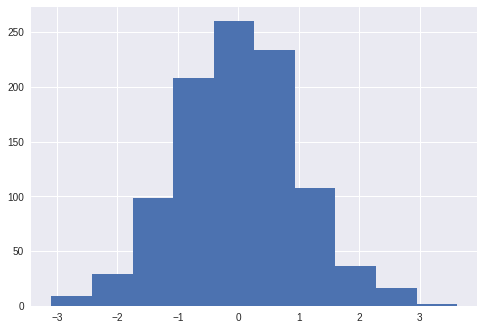

In [0]:
import matplotlib.pyplot as plt

plt.hist(np.random.normal(size=(1000,)))
plt.show()

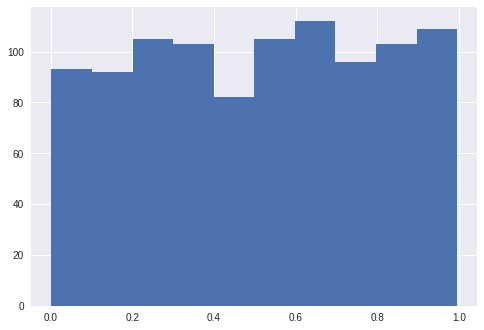

In [0]:
import matplotlib.pyplot as plt

plt.hist(np.random.uniform(size=(1000,)))
plt.show()

### ndarray 的常用屬性

- `.shape`
- `.ndim`
- `.dtype`

In [0]:
import numpy as np

arr = np.array([True, False])
print(arr)
print(arr.dtype)

[ True False]
bool


In [0]:
arr = np.append(arr, 87)
print(arr)
print(arr.dtype)

[ 1  0 87]
int64


In [0]:
arr = np.append(arr, 8.7)
print(arr)
print(arr.dtype)

[ 1.   0.  87.   8.7]
float64


In [0]:
arr = np.append(arr, "NumPy")
print(arr)
print(arr.dtype)

['1.0' '0.0' '87.0' '8.7' 'NumPy']
<U32


### ndarray 的常用方法

- `.astype()`
- `.reshape()`
- `.ravel()`
- `.sum()` /  `.mean()` /  `.median()` /  `.std()` ... 搭配 `axis=None` or `axis=0` or `axis=1`

In [0]:
arr = np.array([87])
print(arr)
print(arr.dtype)

[87]
int64


In [0]:
arr = arr.astype("int64")
print(arr.dtype)

int64


In [0]:
arr = np.array([87])
arr = arr.reshape(())
print(arr)

87


In [0]:
arr = np.array([87, 78, 7, 8])
print(arr)
print(arr.reshape(2, 2))
print(arr.reshape(2, 2).ravel())

[87 78  7  8]
[[87 78]
 [ 7  8]]
[87 78  7  8]


In [0]:
print(arr.reshape(-1, 1))

[[87]
 [78]
 [ 7]
 [ 8]]


In [0]:
import numpy as np

temps_c = np.array([25, 11, -14, -3, 22])
temps_f = temps_c * 9 / 5 + 32
temps_arr = np.vstack([temps_c, temps_f])
print(temps_arr)
print(temps_arr.min())
print(temps_arr.min(axis=1))

[[ 25.   11.  -14.   -3.   22. ]
 [ 77.   51.8   6.8  26.6  71.6]]
-14.0
[-14.    6.8]


In [0]:
temps_arr_t = temps_arr.T
print(temps_arr_t)
print(temps_arr_t.min())
print(temps_arr_t.min(axis=0))

[[ 25.   77. ]
 [ 11.   51.8]
 [-14.    6.8]
 [ -3.   26.6]
 [ 22.   71.6]]
-14.0
[-14.    6.8]


### ndarray 的矩陣函數、方法

- `np.eye`: **I**dentity matrix
- `np.diag`
- `np.transpose` / `array.T`
- `np.dot` /  `array.dot`

In [0]:
np.eye(2)

array([[1., 0.],
       [0., 1.]])

In [0]:
np.diag([1, 2, 3, 4])

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [0]:
arr = np.ones((3, 5))
print(arr)
print(np.transpose(arr))

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [0]:
arr = np.ones((2, 2))
arr_2 = np.array([2])
print(arr)
print(arr*arr)
print(arr*arr_2)

[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[2. 2.]
 [2. 2.]]


In [0]:
np.dot(arr, arr) # arr.dot(arr)

array([[2., 2.],
       [2., 2.]])

In [0]:
np.dot(arr, arr_2)

ValueError: ignored

In [0]:
import numpy as np

u = np.array([4, -4, -3]).reshape(-1, 1)
v = np.array([4, 2, 4]).reshape(-1, 1)
u_T = u.T
u_T.dot(v)

array([[-4]])

In [0]:
import numpy as np

A = np.arange(1, 10).reshape(3, 3)
I = np.eye(3)
print(A)
print(I)
print(A.dot(I))
print(I.dot(A))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [0]:
import numpy as np

A = np.array([1, 2, 4, 5]).reshape(2, 2)
B = np.arange(4, 0, -1).reshape(2, 2)
print(A)
print(B)
print(A.dot(B))
print(B.dot(A))

[[1 2]
 [4 5]]
[[4 3]
 [2 1]]
[[ 8  5]
 [26 17]]
[[16 23]
 [ 6  9]]


## Pandas

- **Pan**el **Da**taFrame **S**eries

<https://pandas.pydata.org/pandas-docs/stable/>

- 不錯的功能：
  - I/O
  - 提供 Series, DataFrame...等資料結構
  - 作圖（matplotlib.pyplot）
  
- Installation: `pip install pandas`
- Import: `import pandas as pd`

### Series 建立方法

In [0]:
import pandas as pd

temps_c = [25, 11, -14, -3, 22]
cities = ["Taipei", "Tokyo", "New York", "London", "Honolulu"]
temp_ser = pd.Series(temps_c, index=cities)
print(temp_ser)
print(type(temp_ser))

Taipei      25
Tokyo       11
New York   -14
London      -3
Honolulu    22
dtype: int64
<class 'pandas.core.series.Series'>


In [0]:
print(temp_ser["New York"])
print(temp_ser[2])

-14
-14


In [0]:
print(temp_ser.index)

Index(['Taipei', 'Tokyo', 'New York', 'London', 'Honolulu'], dtype='object')


In [0]:
print(temp_ser.index)

Index(['Taipei', 'Tokyo', 'New York', 'London', 'Honolulu'], dtype='object')


In [0]:
print(temp_ser.values)

[ 25  11 -14  -3  22]


In [0]:
print(type(temp_ser.values))

<class 'numpy.ndarray'>


In [0]:
import pandas as pd

temps_dict = {
    "Taipei": 25,
    "Tokyo": 11,
    "New York": -14,
    "London": -3,
    "Honolulu": 22
}

temp_ser = pd.Series(temps_dict)
print(temp_ser)

Honolulu    22
London      -3
New York   -14
Taipei      25
Tokyo       11
dtype: int64


### Series 性質

- 繼承一切 ndarray 的特性
  - Element-wise opeartion / Broadcasting
  - Indexing / Slicing 是更彈性的
  - Supporting boolean filtering
  - 隱性轉換資料的型別

In [0]:
temp_ser * 9 / 5 + 32

Taipei      77.0
Tokyo       51.8
New York     6.8
London      26.6
Honolulu    71.6
dtype: float64

In [0]:
temp_ser[[0, 1, 3]]

Taipei    25
Tokyo     11
London    -3
dtype: int64

In [0]:
temp_ser[["Taipei", "Tokyo", "London"]]

Taipei    25
Tokyo     11
London    -3
dtype: int64

In [0]:
temp_ser < 0

Taipei      False
Tokyo       False
New York     True
London       True
Honolulu    False
dtype: bool

In [0]:
temp_ser[temp_ser < 0]

New York   -14
London      -3
dtype: int64

In [0]:
temp_ser[[False, False, True, True, False]]

New York   -14
London      -3
dtype: int64

In [0]:
arr = np.array([True, False])
ser = pd.Series(arr)
print(ser.dtype)

bool


In [0]:
arr = np.array([True, False, 87])
ser = pd.Series(arr)
print(ser.dtype)

int64


In [0]:
arr = np.array([True, False, 87, 8.7])
ser = pd.Series(arr)
print(ser.dtype)

float64


In [0]:
arr = np.array([True, False, 87, 8.7, "pandas"])
ser = pd.Series(arr)
print(ser.dtype)

object


### DataFrame 建立方法

> Flexible and powerful data analysis / manipulation library for Python, providing labeled data structures similar to R data.frame objects, statistical functions, and much more

In [0]:
import pandas as pd

df = pd.DataFrame()
df["city"] = cities
df["temp_c"] = temps_c
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,city,temp_c
0,Taipei,25
1,Tokyo,11
2,New York,-14
3,London,-3
4,Honolulu,22


In [0]:
import pandas as pd

temps_dict = {
    "temp_c": [25, 11, -14, -3, 22],
    "city": ["Taipei", "Tokyo", "New York", "London", "Honolulu"]
}
df = pd.DataFrame(temps_dict)
df

,city,temp_c
0,Taipei,25
1,Tokyo,11
2,New York,-14
3,London,-3
4,Honolulu,22


### DataFrame  性質

- `df.index`
- `df.columns`
- `df.values`
- `df.shape`
- `df.dtypes`
- `df.head()`
- `df.tail()`
- `df.info()`
- `df.describe()`

In [0]:
df.index

RangeIndex(start=0, stop=5, step=1)

In [0]:
df.columns

Index(['city', 'temp_c'], dtype='object')

In [0]:
df.values

array([['Taipei', 25],
       ['Tokyo', 11],
       ['New York', -14],
       ['London', -3],
       ['Honolulu', 22]], dtype=object)

In [0]:
df.dtypes

city      object
temp_c     int64
dtype: object

In [0]:
df["city"]

0      Taipei
1       Tokyo
2    New York
3      London
4    Honolulu
Name: city, dtype: object

In [0]:
print(type(df["city"]))

<class 'pandas.core.series.Series'>


In [0]:
print(df["city"].index)

RangeIndex(start=0, stop=5, step=1)


In [0]:
print(df["city"].values)

['Taipei' 'Tokyo' 'New York' 'London' 'Honolulu']


In [0]:
df.shape

(5, 2)

In [0]:
df.head(n=3)

,city,temp_c
0,Taipei,25
1,Tokyo,11
2,New York,-14


In [0]:
df.tail(n=3)

,city,temp_c
2,New York,-14
3,London,-3
4,Honolulu,22


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
city      5 non-null object
temp_c    5 non-null int64
dtypes: int64(1), object(1)
memory usage: 160.0+ bytes


In [0]:
df.describe()

,temp_c
count,5.000000
mean,8.200000
std,16.574076
min,-14.000000
25%,-3.000000
50%,11.000000
75%,22.000000
max,25.000000


### DatFrame 基礎操作

|操作|方法名|
|-------|-----------|
|select|`.loc`, `.iloc`|
|filter|`.loc`, `.iloc`|
|arrange|`.sort_values`, `sort_index`|
|mutate|`.map`|
|summarise|...|
|group by| `.group_by()`|

In [0]:
import pandas as pd

temps_c = [25, 11, -14, -3, 22]
cities = ["Taipei", "Tokyo", "New York", "London", "Honolulu"]
df = pd.DataFrame()
df["city"] = cities
df["temp"] = temps_c
df

,city,temp
0,Taipei,25
1,Tokyo,11
2,New York,-14
3,London,-3
4,Honolulu,22


In [0]:
df["city"] # df[["city"]]

0      Taipei
1       Tokyo
2    New York
3      London
4    Honolulu
Name: city, dtype: object

In [0]:
df[["temp"]]

,temp
0,25
1,11
2,-14
3,-3
4,22


In [0]:
df[df["temp"] < 0]

,city,temp
2,New York,-14
3,London,-3


In [0]:
df[~df["temp"] < 0]

,city,temp
0,Taipei,25
1,Tokyo,11
4,Honolulu,22


In [0]:
# .loc
df.loc[[2, 3], ["city"]]

,city
2,New York
3,London


In [0]:
# .iloc
df.iloc[[2, 3], [0]]

,city
2,New York
3,London


In [0]:
df_reverse = df.sort_index(ascending=False)
df_reverse

,city,temp
4,Honolulu,22
3,London,-3
2,New York,-14
1,Tokyo,11
0,Taipei,25


In [0]:
df_reverse.loc[[2, 3], ["city"]]

,city
2,New York
3,London


In [0]:
df_reverse.iloc[[2, 1], [0]]

,city
2,New York
3,London


In [0]:
df.sort_index(ascending=False)

,city,temp
4,Honolulu,22
3,London,-3
2,New York,-14
1,Tokyo,11
0,Taipei,25


In [0]:
df.sort_values("city")

,city,temp
4,Honolulu,22
3,London,-3
2,New York,-14
0,Taipei,25
1,Tokyo,11


In [0]:
countries = ["Taiwan", "Japan", "United States", "United Kingdom", "United States"]
df["country"] = countries
df

,city,temp,country
0,Taipei,25,Taiwan
1,Tokyo,11,Japan
2,New York,-14,United States
3,London,-3,United Kingdom
4,Honolulu,22,United States


In [0]:
df = df[["country", "city", "temp"]]

In [0]:
continents = ["Asia", "Asia", "North America", "Europe", "North America"]
df = df.assign(continent = continents)
df

,country,city,temp,continent
0,Taiwan,Taipei,25,Asia
1,Japan,Tokyo,11,Asia
2,United States,New York,-14,North America
3,United Kingdom,London,-3,Europe
4,United States,Honolulu,22,North America


In [0]:
df = df.drop("continent", axis=1)

In [0]:
def get_continent(x):
  if x == "Taiwan" or x == "Japan":
    cont = "Asia"
  elif x == "United Kingdom":
    cont = "Europe"
  else:
    cont = "North America"
  return cont

In [0]:
df["country"].map(get_continent)

0             Asia
1             Asia
2    North America
3           Europe
4    North America
Name: country, dtype: object

In [0]:
country_continent_dict = {
    "Taiwan": "Asia",
    "Japan": "Asia",
    "United States": "North America",
    "United Kingdom": "Europe"
}
df["country"].map(country_continent_dict)

0             Asia
1             Asia
2    North America
3           Europe
4    North America
Name: country, dtype: object

In [0]:
df["temp"].min()

-14

In [0]:
df["temp"].max()

25

In [0]:
df["continent"] = df["country"].map(get_continent)
df

,country,city,temp,continent
0,Taiwan,Taipei,25,Asia
1,Japan,Tokyo,11,Asia
2,United States,New York,-14,North America
3,United Kingdom,London,-3,Europe
4,United States,Honolulu,22,North America


In [0]:
grouped = df.groupby("continent")
grouped.max()

,country,city,temp
continent,,,
Asia,Taiwan,Tokyo,25
Europe,United Kingdom,London,-3
North America,United States,New York,22


In [0]:
grouped.min()

,country,city,temp
continent,,,
Asia,Japan,Taipei,11
Europe,United Kingdom,London,-3
North America,United States,Honolulu,-14


### DataFrame 的 index

In [0]:
import pandas as pd

cities = ["Taipei", "Tokyo", "New York", "London", "Honolulu"]
temps_c = [17, 4, 1, 3, 18]
df = pd.DataFrame()
df["city"] = cities
df["temp_c"] = temps_c
df

,city,temp_c
0,Taipei,17
1,Tokyo,4
2,New York,1
3,London,3
4,Honolulu,18


In [0]:
df.index

RangeIndex(start=0, stop=5, step=1)

In [0]:
df.set_index("city").loc["Taipei", :]

temp_c    17
Name: Taipei, dtype: int64

In [0]:
max_temp = df["temp_c"].max()
max_temp

18

In [0]:
min_temp = df["temp_c"].min()
min_temp

1

In [0]:
df[df["temp_c"] == max_temp]["city"].values[0]

'Honolulu'

In [0]:
df[df["temp_c"] == min_temp]["city"].values[0]

'New York'

In [0]:
df_reindexed = df.set_index("city")
df_reindexed

,temp_c
city,
Taipei,17
Tokyo,4
New York,1
London,3
Honolulu,18


In [0]:
df_reindexed["temp_c"].idxmax()

'Honolulu'

In [0]:
df_reindexed["temp_c"].idxmin()

'New York'

In [0]:
df_reindexed.reset_index()

,city,temp_c
0,Taipei,17
1,Tokyo,4
2,New York,1
3,London,3
4,Honolulu,18


## pandas：奧運獎牌排行

In [0]:
import pandas as pd

df = pd.read_csv('https://storage.googleapis.com/py_ml_datasets/olympics.csv', index_col=0, skiprows=1)

for col in df.columns:
    if col[:2]=='01':
        df.rename(columns={col:'Gold'+col[4:]}, inplace=True)
    if col[:2]=='02':
        df.rename(columns={col:'Silver'+col[4:]}, inplace=True)
    if col[:2]=='03':
        df.rename(columns={col:'Bronze'+col[4:]}, inplace=True)
    if col[:1]=='№':
        df.rename(columns={col:'#'+col[1:]}, inplace=True)

names_ids = df.index.str.split('\s\(') # split the index by '('

df.index = names_ids.str[0] # the [0] element is the country name (new index) 
df['ID'] = names_ids.str[1].str[:3] # the [1] element is the abbreviation or ID (take first 3 characters from that)

df = df.drop('Totals')

In [0]:
df.shape

(146, 16)

In [0]:
df.head()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total,ID
Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2,AFG
Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15,ALG
Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70,ARG
Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12,ARM
Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12,ANZ


In [0]:
df.index

Index(['Afghanistan', 'Algeria', 'Argentina', 'Armenia', 'Australasia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       ...
       'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam', 'Virgin Islands',
       'Yugoslavia', 'Independent Olympic Participants', 'Zambia', 'Zimbabwe',
       'Mixed team'],
      dtype='object', length=146)

In [0]:
# Q1
df["Gold"].idxmax()

'United States'

In [0]:
# Q2
((df["Gold"] - df["Gold.1"])).abs().idxmax()

'United States'

In [0]:
(df["Gold.1"] - df["Gold"]).abs().idxmax()

'United States'

In [0]:
# Q3
ratio = (df["Gold"] - df["Gold.1"]) / df["Gold.2"]
ratio[ratio != 1].idxmax()

'Bulgaria'

In [0]:
df.loc[["Bulgaria"], :]

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total,ID
Bulgaria,19,51,85,78,214,19,1,2,3,6,38,52,87,81,220,BUL


## pandas：美國普查

In [0]:
import pandas as pd

df = pd.read_csv('https://storage.googleapis.com/py_ml_datasets/census.csv')

In [0]:
df.shape

(3193, 100)

In [0]:
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [0]:
df["STNAME"].unique().size

51

In [0]:
df[df["SUMLEV"] == 40].shape

(51, 100)

In [0]:
# Q1
# Iteration
us_state_list = df["STNAME"].unique()
n_of_counties = []
for st in us_state_list:
  subset = df[df["STNAME"] == st]
  noc = subset.shape[0] - 1
  n_of_counties.append(noc)
noc_ser = pd.Series(n_of_counties, index=us_state_list)
print(noc_ser.idxmax())
print(noc_ser.max())

Texas
254


In [0]:
# DataFrame
grouped = df.groupby("STNAME")
print(grouped["CTYNAME"].count().idxmax())
print((grouped["CTYNAME"].count() - 1).max())

Texas
254


In [0]:
# Q2
# Iteration
county_df = df[df["SUMLEV"] == 50]
us_state_list = county_df["STNAME"].unique()
state_top3_pop = []
for st in us_state_list:
  subset = county_df[county_df["STNAME"] == st]
  top3_pop = subset.sort_values("CENSUS2010POP", ascending=False)[:3]["CENSUS2010POP"].sum()
  state_top3_pop.append(top3_pop)
state_top3_pop_ser = pd.Series(state_top3_pop, index=us_state_list)
ans = list(state_top3_pop_ser.sort_values(ascending=False)[:3].index)
print(ans)

['California', 'Texas', 'Illinois']


In [0]:
# DataFrame
county_df = df[df["SUMLEV"] == 50]
grouped = county_df.groupby("STNAME")
ans = list(grouped["CENSUS2010POP"].nlargest(3).groupby("STNAME").sum().nlargest(3).index)
print(ans)

['California', 'Texas', 'Illinois']


In [0]:
# Q3
# Iteration
county_df = df[df["SUMLEV"] == 50]
indice = county_df.index
diff_pop_list = []
for i in indice:
  subset = county_df.loc[i, "POPESTIMATE2010":"POPESTIMATE2015"]
  max_pop = subset.max()
  min_pop = subset.min()
  diff_pop = max_pop - min_pop
  diff_pop_list.append(diff_pop)
diff_pop_ser = pd.Series(diff_pop_list, index=county_df["CTYNAME"].values)
diff_pop_ser.idxmax()

'Harris County'

In [0]:
# DataFrame
county_df = df[df["SUMLEV"] == 50]
max_pop = county_df.loc[:, "POPESTIMATE2010":"POPESTIMATE2015"].max(axis=1)
min_pop = county_df.loc[:, "POPESTIMATE2010":"POPESTIMATE2015"].min(axis=1)
diff_pop = max_pop - min_pop
max_idx = diff_pop.idxmax()
county_df.loc[[max_idx], :]["CTYNAME"].values[0]

'Harris County'

In [0]:
#Q4
county_filter = df["SUMLEV"] == 50
#region_filter = (df["REGION"] == 1) | (df["REGION"] == 2)
region_filter = df["REGION"].isin([1, 2])
pop_filter = df["POPESTIMATE2015"] > df["POPESTIMATE2014"]
washington_filter = df["CTYNAME"].str.startswith("Washington")
df[county_filter & region_filter & pop_filter & washington_filter][["STNAME", "CTYNAME"]]

,STNAME,CTYNAME
896,Iowa,Washington County
1419,Minnesota,Washington County
2345,Pennsylvania,Washington County
2355,Rhode Island,Washington County
3163,Wisconsin,Washington County


In [0]:
county_df[county_df["CTYNAME"].str.contains("Washington")]

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
65,50,3,6,1,129,Alabama,Washington County,17581,17583,17610,...,-14.708407,-13.062030,-11.181733,1.067236,-0.950486,-13.849940,-12.075121,-10.122411,2.193763,0.118811
186,50,3,7,5,143,Arkansas,Washington County,203065,203060,204026,...,5.763423,5.801883,10.908233,7.168967,9.211963,9.191373,8.872065,14.267128,10.975336,12.950540
311,50,4,8,8,121,Colorado,Washington County,4814,4814,4801,...,-3.537981,-12.780222,10.930110,1.463823,15.336788,-2.913632,-12.570710,11.140305,1.672940,15.544041
396,50,3,5,12,133,Florida,Washington County,24896,24896,24754,...,-5.796984,10.967886,-8.778317,-5.505710,11.155898,-5.756446,11.008357,-8.697411,-5.301794,11.359472
547,50,3,5,13,303,Georgia,Washington County,21187,21187,21110,...,-6.219880,-11.035998,-12.870571,-3.054694,8.835458,-6.219880,-11.035998,-12.870571,-3.006206,8.883739
607,50,4,8,16,87,Idaho,Washington County,10198,10198,10195,...,-5.508558,-6.342285,-8.501700,6.613558,-5.302121,-5.606925,-6.342285,-8.501700,6.713763,-5.102041
703,50,2,3,17,189,Illinois,Washington County,14716,14716,14701,...,-8.057633,2.192006,-12.192182,-2.775850,-10.605638,-8.125918,2.123506,-12.192182,-2.775850,-10.605638
799,50,2,3,18,175,Indiana,Washington County,28262,28262,28284,...,-3.683894,-9.517699,-5.310179,0.717901,-5.454774,-3.258829,-9.161231,-4.879624,1.148641,-5.024134
896,50,2,4,19,183,Iowa,Washington County,21704,21704,21697,...,5.743693,2.468684,-0.364282,0.272171,1.849596,5.881542,2.560117,-0.273212,0.408256,1.984933
1005,50,2,4,20,201,Kansas,Washington County,5799,5799,5782,...,10.504563,-18.164519,-18.821460,-5.501819,-6.948156,12.054417,-16.780555,-17.238347,-3.549561,-4.988420


In [0]:
washingtons = ["Washington County", "County Washington", "Lincoln County"]
washington_ser = pd.Series(washingtons)
print(washington_ser.str.contains("Washington"))
print(washington_ser.str.contains("^Washington"))
print(washington_ser.str.contains("Washington$"))

0     True
1     True
2    False
dtype: bool
0     True
1    False
2    False
dtype: bool
0    False
1     True
2    False
dtype: bool


In [0]:
print(washington_ser.str.match("Washington"))
print(washington_ser.str.match("^Washington"))
print(washington_ser.str.match("Washington$"))

0     True
1    False
2    False
dtype: bool
0     True
1    False
2    False
dtype: bool
0    False
1    False
2    False
dtype: bool


## pandas：中選會投票所明細

In [0]:
import pandas as pd
import string

def read_cec_excel(xls_file):
  """
  Import Excel sheet from CEC as a pandas DataFrame
  """
  df = pd.read_excel(xls_file, skiprows=[0, 1, 3, 4])
  # dealing with header
  n_cols = len(df.columns)
  n_candidates = n_cols - 11
  column_names = df.columns
  candidates = column_names[3:(3 + n_candidates)]
  candidates_information = []
  for cand in candidates:
    cand_split = cand.split("\n")
    if cand_split[2] == ' ':
      party = "無黨籍"
    else:
      party = cand_split[2]
    candidate_info = "{} {} {}".format(cand_split[0], cand_split[1], party)
    candidates_information.append(candidate_info)
  front_cols = ["district", "village", "office"]
  back_cols = list(string.ascii_uppercase[:8])
  df_header = front_cols + candidates_information + back_cols
  # combining observations with header
  df.columns = df_header
  # imputing districts
  district_without_space = [d.strip() for d in list(df["district"])]
  district_imputed = district_without_space
  for i in range(len(district_without_space)):
    if len(district_without_space[i]) == 0:
      district_imputed[i] = district_imputed[i - 1]
  df["district"] = district_imputed
  # drop rows with NaN
  df = df.dropna().reset_index(drop=True)
  # convert office dtype to int
  df["office"] = df["office"].astype(int)
  # returning dataframe
  return df

In [0]:
city_ids = [100, 200, 300, 400, 500, 600]
county_ids = list(range(701, 715)) + [801, 802]
cities = ["台北市", "新北市", "桃園市", "台中市", "台南市", "高雄市"]
counties = ["新竹縣", "苗栗縣", "彰化縣", "南投縣", "雲林縣", "嘉義縣", "屏東縣", "宜蘭縣", "花蓮縣", "台東縣", "澎湖縣", "基隆市", "新竹市", "嘉義市", "金門縣", "連江縣"]
admin_areas = cities + counties
city_xls_file_urls = ["https://s3-ap-northeast-1.amazonaws.com/tw-election-2018/city-mayor/{}.xls".format(cid) for cid in city_ids]
county_xls_file_urls = ["https://s3-ap-northeast-1.amazonaws.com/tw-election-2018/county-mayor/{}.xls".format(cid) for cid in county_ids]
xls_file_urls = city_xls_file_urls + county_xls_file_urls
for aa, xfu in zip(admin_areas, xls_file_urls):
  print(aa, xfu)

台北市 https://s3-ap-northeast-1.amazonaws.com/tw-election-2018/city-mayor/100.xls
新北市 https://s3-ap-northeast-1.amazonaws.com/tw-election-2018/city-mayor/200.xls
桃園市 https://s3-ap-northeast-1.amazonaws.com/tw-election-2018/city-mayor/300.xls
台中市 https://s3-ap-northeast-1.amazonaws.com/tw-election-2018/city-mayor/400.xls
台南市 https://s3-ap-northeast-1.amazonaws.com/tw-election-2018/city-mayor/500.xls
高雄市 https://s3-ap-northeast-1.amazonaws.com/tw-election-2018/city-mayor/600.xls
新竹縣 https://s3-ap-northeast-1.amazonaws.com/tw-election-2018/county-mayor/701.xls
苗栗縣 https://s3-ap-northeast-1.amazonaws.com/tw-election-2018/county-mayor/702.xls
彰化縣 https://s3-ap-northeast-1.amazonaws.com/tw-election-2018/county-mayor/703.xls
南投縣 https://s3-ap-northeast-1.amazonaws.com/tw-election-2018/county-mayor/704.xls
雲林縣 https://s3-ap-northeast-1.amazonaws.com/tw-election-2018/county-mayor/705.xls
嘉義縣 https://s3-ap-northeast-1.amazonaws.com/tw-election-2018/county-mayor/706.xls
屏東縣 https://s3-ap-northeast-

In [0]:
df_dict = dict()
for aa, xfu in zip(admin_areas, xls_file_urls):
  df_dict[aa] = read_cec_excel(xfu)
  print("現在讀取{}資料...".format(aa))
print(len(df_dict))

現在讀取台北市資料
現在讀取新北市資料
現在讀取桃園市資料
現在讀取台中市資料
現在讀取台南市資料
現在讀取高雄市資料
現在讀取新竹縣資料
現在讀取苗栗縣資料
現在讀取彰化縣資料
現在讀取南投縣資料
現在讀取雲林縣資料
現在讀取嘉義縣資料
現在讀取屏東縣資料
現在讀取宜蘭縣資料
現在讀取花蓮縣資料
現在讀取台東縣資料
現在讀取澎湖縣資料
現在讀取基隆市資料
現在讀取新竹市資料
現在讀取嘉義市資料
現在讀取金門縣資料
現在讀取連江縣資料
22


In [0]:
print(df_dict.keys())

dict_keys(['台北市', '新北市', '桃園市', '台中市', '台南市', '高雄市', '新竹縣', '苗栗縣', '彰化縣', '南投縣', '雲林縣', '嘉義縣', '屏東縣', '宜蘭縣', '花蓮縣', '台東縣', '澎湖縣', '基隆市', '新竹市', '嘉義市', '金門縣', '連江縣'])


In [0]:
df_dict["台北市"].shape

(1563, 16)

In [0]:
df_dict["新北市"].shape

(2446, 13)

In [0]:
import pandas as pd

cities = ["Taipei", "Seoul", "Boston", "London", "Reykjavik"]
temps_c = [19, 2, 3, 8, 1]
wide_df = pd.DataFrame()
wide_df["city"] = cities
wide_df["Celsius"] = temps_c
wide_df["Fahrenheit"] = wide_df["Celsius"] * (9/5) + 32
wide_df

,city,Celsius,Fahrenheit
0,Taipei,19,66.2
1,Seoul,2,35.6
2,Boston,3,37.4
3,London,8,46.4
4,Reykjavik,1,33.8


In [0]:
cities = cities * 2
scale = ["Celsius" for _ in range(5)] + ["Fahrenheit" for _ in range(5)]
temp = temps_c + [t*(9/5) + 32 for t in temps_c]
long_df = pd.DataFrame()
long_df["city"] = cities
long_df["scale"] = scale
long_df["temp"] = temp
long_df

,city,scale,temp
0,Taipei,Celsius,19.0
1,Seoul,Celsius,2.0
2,Boston,Celsius,3.0
3,London,Celsius,8.0
4,Reykjavik,Celsius,1.0
5,Taipei,Fahrenheit,66.2
6,Seoul,Fahrenheit,35.6
7,Boston,Fahrenheit,37.4
8,London,Fahrenheit,46.4
9,Reykjavik,Fahrenheit,33.8


In [0]:
# pd.melt
pd.melt(wide_df, id_vars="city", var_name="scale", value_name="degree")

,city,scale,degree
0,Taipei,Celsius,19.0
1,Seoul,Celsius,2.0
2,Boston,Celsius,3.0
3,London,Celsius,8.0
4,Reykjavik,Celsius,1.0
5,Taipei,Fahrenheit,66.2
6,Seoul,Fahrenheit,35.6
7,Boston,Fahrenheit,37.4
8,London,Fahrenheit,46.4
9,Reykjavik,Fahrenheit,33.8


In [0]:
import pandas as pd

players = ["Steve Nash", "Michael Jordan", "Kevin Garnett", "Dirk Nowitzski", "Shaquille O'Neal"]
heights = [190, 198, 213, 213, 216]
weights = [82, 98, 113, 111, 148]
# wide-format
# use pd.melt() 轉換成 long-format

In [0]:
pd.melt(wide_df, id_vars="city", var_name="scale", value_name="degree").pivot(index="city", columns="scale", values="degree")

scale,Celsius,Fahrenheit
city,,
Boston,3.0,37.4
London,8.0,46.4
Reykjavik,1.0,33.8
Seoul,2.0,35.6
Taipei,19.0,66.2


In [0]:
df_dict["台北市"].head()

,district,village,office,1 吳蕚洋 無黨籍,2 丁守中 中國國民黨,3 姚文智 民主進步黨,4 柯文哲 無黨籍,5 李錫錕 無黨籍,A,B,C,D,E,F,G,H
0,北投區,建民里,1,4,338,196,316,8,862,9,871,0,871,417,1288,67.620003
1,北投區,建民里,2,2,326,243,412,5,988,11,999,0,999,363,1362,73.349998
2,北投區,建民里,3,2,247,144,306,3,702,9,711,0,711,328,1039,68.430000
3,北投區,文林里,4,1,282,177,307,8,775,4,779,0,779,396,1175,66.300003
4,北投區,文林里,5,5,315,183,378,5,886,3,889,1,890,399,1289,68.970001


In [0]:
df_dict["新北市"].head()

,district,village,office,1 蘇貞昌 民主進步黨,2 侯友宜 中國國民黨,A,B,C,D,E,F,G,H
0,石門區,德茂里,1,399,451,850,14,864,0,864,228,1092,79.120003
1,石門區,富基里,2,354,474,828,31,859,0,859,483,1342,64.010002
2,石門區,老梅里,3,255,339,594,17,611,0,611,294,905,67.510002
3,石門區,老梅里,4,386,398,784,27,811,0,811,393,1204,67.360001
4,石門區,山溪里,5,241,369,610,21,631,0,631,229,860,73.370003


In [0]:
import string

tp = df_dict["台北市"]
back_cols = list(string.ascii_uppercase[:8])
tp = tp.drop(labels = back_cols, axis=1)
tp_long = pd.melt(tp, id_vars=["district", "village", "office"], var_name="candidate_info", value_name="votes")
tp_long.shape

(7815, 5)

In [0]:
ntp = df_dict["新北市"]
ntp = ntp.drop(labels = back_cols, axis=1)
ntp_long = pd.melt(ntp, id_vars=["district", "village", "office"], var_name="candidate_info", value_name="votes")
ntp_long.shape

(4892, 5)

In [0]:
mayors = pd.DataFrame()
mayors = mayors.append(tp_long)
mayors

,district,village,office,candidate_info,votes
0,北投區,建民里,1,1 吳蕚洋 無黨籍,4
1,北投區,建民里,2,1 吳蕚洋 無黨籍,2
2,北投區,建民里,3,1 吳蕚洋 無黨籍,2
3,北投區,文林里,4,1 吳蕚洋 無黨籍,1
4,北投區,文林里,5,1 吳蕚洋 無黨籍,5
5,北投區,文林里,6,1 吳蕚洋 無黨籍,3
6,北投區,石牌里,7,1 吳蕚洋 無黨籍,0
7,北投區,石牌里,8,1 吳蕚洋 無黨籍,4
8,北投區,石牌里,9,1 吳蕚洋 無黨籍,5
9,北投區,福興里,10,1 吳蕚洋 無黨籍,3


In [0]:
mayors = mayors.append(ntp_long)
mayors.tail()

,district,village,office,candidate_info,votes
4887,汐止區,宜興里,2442,2 侯友宜 中國國民黨,570
4888,汐止區,宜興里,2443,2 侯友宜 中國國民黨,562
4889,汐止區,東勢里,2444,2 侯友宜 中國國民黨,397
4890,汐止區,東勢里,2445,2 侯友宜 中國國民黨,431
4891,汐止區,東勢里,2446,2 侯友宜 中國國民黨,642


In [0]:
mayors.head()

,district,village,office,candidate_info,votes
0,北投區,建民里,1,1 吳蕚洋 無黨籍,4
1,北投區,建民里,2,1 吳蕚洋 無黨籍,2
2,北投區,建民里,3,1 吳蕚洋 無黨籍,2
3,北投區,文林里,4,1 吳蕚洋 無黨籍,1
4,北投區,文林里,5,1 吳蕚洋 無黨籍,5


In [0]:
import string

# 堆疊 22 個 DataFrames 成為一個 df: mayors
# 新增一個 column: admin_area 註記縣市
mayors = pd.DataFrame()
for k in df_dict.keys():
  wide_df = df_dict[k]
  # drop A:H columns
  cols_to_drop = list(string.ascii_uppercase[:8])
  wide_df = wide_df.drop(labels = cols_to_drop, axis=1)
  # pd.melt()
  long_df = pd.melt(wide_df, id_vars=["district", "village", "office"], var_name="candidate_info", value_name="votes")
  # mutate column: admin_area
  long_df["admin_area"] = k
  # append
  mayors = mayors.append(long_df)
# reset index!
mayors = mayors.reset_index(drop=True)
# 將 candidate_info 拆開成為三個獨立的欄位 number / candidate / party
candidate_info = mayors["candidate_info"].str.split(expand=True)
mayors["number"] = candidate_info[0]
mayors["candidate"] = candidate_info[1]
mayors["party"] = candidate_info[2]
# drop candidate_info
mayors = mayors.drop("candidate_info", axis=1)
# select columns
mayors = mayors[["admin_area", "district", "village", "office", "party", "number", "candidate", "votes"]]
mayors.shape

(62689, 8)

In [0]:
mayors.to_csv("mayors.csv", index=False)

In [0]:
!ls

mayors.csv  sample_data  twCounty2010.geo.json


In [0]:
from google.colab import files

files.download("mayors.csv")

## Matplotlib

- 文件：<https://matplotlib.org/tutorials/index.html>

- 安裝

```bash
pip install matplotlib
```

- 載入

```python
import matplotlib.pyplot as plt
```

- 常用的 Python 視覺化套件
  - 低階
    - matplotlib（作圖單位為純量與陣列）
  - 高階
    - pandas（作圖單位為 DataFrame）
    - seaborn（作圖單位為 DataFrame）
 - 互動性（htmlWidget）
    - plotly / dash / bokeh
    
- Demo 資料：Gapminder
- 作圖目的：
  - 觀察排名、個數：長條圖（bar chart）
  - 觀察分佈：直方圖（histogram）、盒鬚圖（boxplot）
  - 觀察相關：散佈圖（scatter plot）
  - 觀察趨勢：線圖（line plot）

In [0]:
from IPython.core.display import display, HTML
display(HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/jbkSRLYSojo" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>'))

In [0]:
import pandas as pd

mayors_url = "https://s3-ap-northeast-1.amazonaws.com/tw-election-2018/mayors.csv"
gapminder_url = "https://storage.googleapis.com/learn_pd_like_tidyverse/gapminder.csv"
mayors = pd.read_csv(mayors_url)
gapminder = pd.read_csv(gapminder_url)

In [0]:
gapminder.shape

(1704, 6)

In [0]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [0]:
gapminder.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


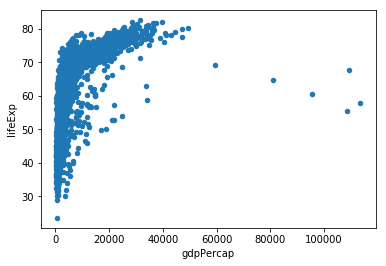

In [0]:
gapminder.plot(kind="scatter", x="gdpPercap", y="lifeExp")
#gapminder.plot.scatter(x="gdpPercap", y="lifeExp")

In [0]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


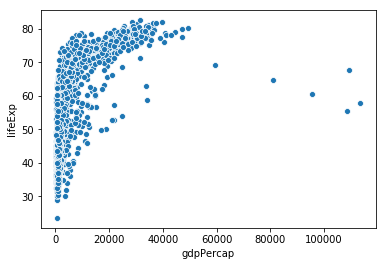

In [0]:
import seaborn as sns

sns.scatterplot(x="gdpPercap", y="lifeExp", data=gapminder)

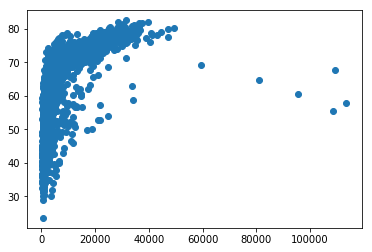

In [0]:
import matplotlib.pyplot as plt

x_arr = gapminder["gdpPercap"].values
y_arr = gapminder["lifeExp"].values
plt.scatter(x=x_arr, y=y_arr)
plt.show()

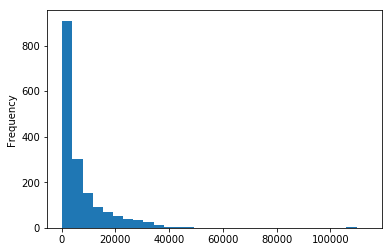

In [0]:
gapminder["gdpPercap"].plot(kind="hist", bins=30)
#gapminder["gdpPercap"].plot.hist(bins=30)
plt.show()

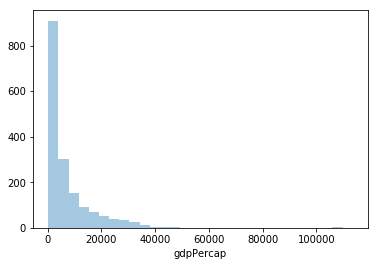

In [0]:
sns.distplot(gapminder["gdpPercap"], bins=30, kde=False)
plt.show()

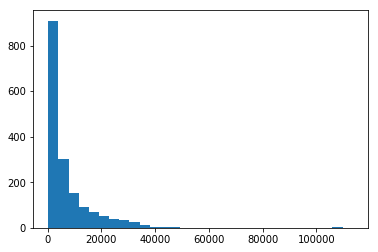

In [0]:
plt.hist(x_arr, bins=30)
plt.show()

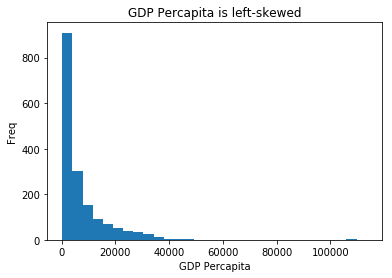

In [0]:
ax = gapminder["gdpPercap"].plot.hist(bins=30, title="GDP Percapita is left-skewed")
ax.set_xlabel("GDP Percapita")
ax.set_ylabel("Freq")
plt.show()

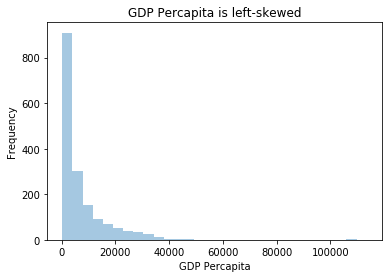

In [0]:
sns.distplot(gapminder["gdpPercap"], bins=30, kde=False)
plt.title("GDP Percapita is left-skewed")
plt.xlabel("GDP Percapita")
plt.ylabel("Frequency")
plt.show()

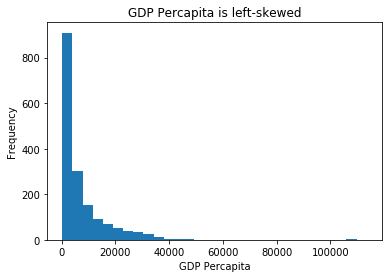

In [0]:
plt.hist(x_arr, bins=30)
plt.title("GDP Percapita is left-skewed")
plt.xlabel("GDP Percapita")
plt.ylabel("Frequency")
plt.show()

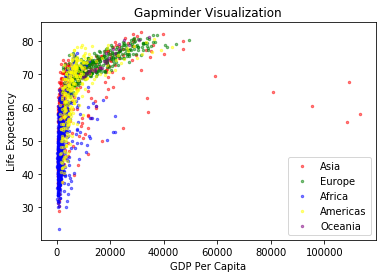

In [0]:
colors = ["red", "green", "blue", "yellow", "purple"]
continents = gapminder["continent"].unique()
for col, cont in zip(colors, continents):
  gapminder_subset = gapminder[gapminder["continent"] == cont]
  x_arr = gapminder_subset["gdpPercap"].values
  y_arr = gapminder_subset["lifeExp"].values
  plt.scatter(x=x_arr, y=y_arr, c=col, s=6, alpha=0.5, label=cont)
plt.title("Gapminder Visualization")
plt.xlabel("GDP Per Capita")
plt.ylabel("Life Expectancy")
plt.legend()
plt.show()

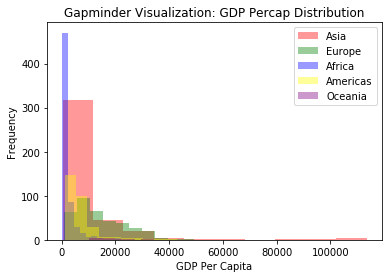

In [0]:
colors = ["red", "green", "blue", "yellow", "purple"]
continents = gapminder["continent"].unique()
for col, cont in zip(colors, continents):
  gapminder_subset = gapminder[gapminder["continent"] == cont]
  x_arr = gapminder_subset["gdpPercap"].values
  #y_arr = gapminder_subset["lifeExp"].values
  plt.hist(x=x_arr, color=col, label=cont, alpha=0.4)
plt.title("Gapminder Visualization: GDP Percap Distribution")
plt.xlabel("GDP Per Capita")
plt.ylabel("Frequency")
plt.legend()
plt.show()

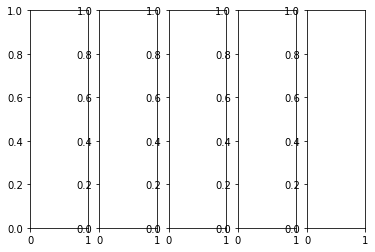

In [0]:
# subplots
fig, axes = plt.subplots(nrows=1, ncols=5)

In [0]:
print(type(fig))
print(type(axes))

<class 'matplotlib.figure.Figure'>
<class 'numpy.ndarray'>


In [0]:
print(axes.shape)

(5,)


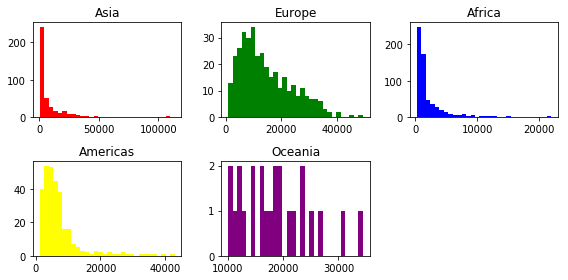

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 4))
colors = ["red", "green", "blue", "yellow", "purple"]
continents = gapminder["continent"].unique()
row_indice = [0, 0, 0, 1, 1]
col_indice = [0, 1, 2, 0, 1]
for col, cont, ri, ci in zip(colors, continents, row_indice, col_indice):
  gapminder_subset = gapminder[gapminder["continent"] == cont]
  x_arr = gapminder_subset["gdpPercap"].values
  axes[ri, ci].hist(x_arr, bins=30, color=col)
  axes[ri, ci].set_title(cont)
axes[1, 2].set_visible(False)
plt.tight_layout()
plt.show()

In [0]:
gapminder.head(n=24)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


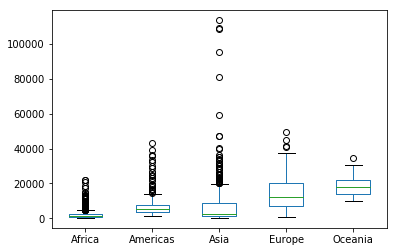

In [0]:
gapminder_with_idx = gapminder.reset_index()
gdpPercap_wide = gapminder_with_idx.pivot(index="index", columns="continent", values="gdpPercap")
gdpPercap_wide.plot.box()
plt.show() 

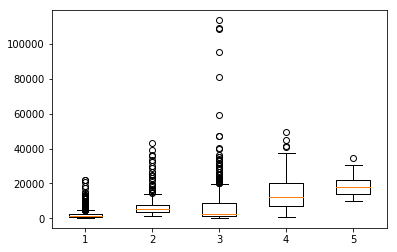

In [0]:
import numpy as np

gdpPercap_wide_arr = gdpPercap_wide.values
n_cols = gdpPercap_wide_arr.shape[1]
arr_to_plot = []
for i in range(n_cols):
  arr_with_nan = gdpPercap_wide_arr[:, i]
  arr_without_nan = arr_with_nan[~np.isnan(arr_with_nan)]
  arr_to_plot.append(arr_without_nan)
  #print(arr_without_nan.shape)
plt.boxplot(arr_to_plot)
plt.show()

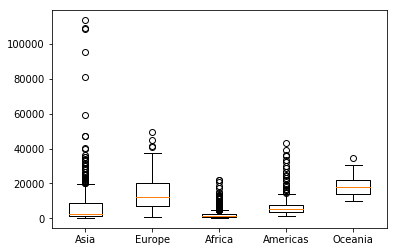

In [0]:
cols_to_plot = []
continents = gapminder["continent"].unique()
for cont in continents:
  gapminder_subset = gapminder[gapminder["continent"] == cont]["gdpPercap"].values
  cols_to_plot.append(gapminder_subset)
  #print(gapminder_subset.shape)
plt.boxplot(cols_to_plot)
plt.xticks(range(1, 6), labels=continents)
plt.show()

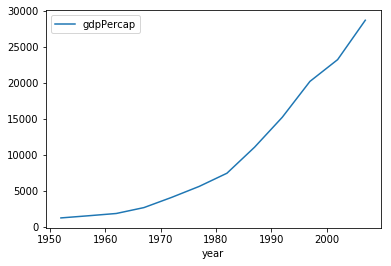

In [0]:
tw = gapminder[gapminder["country"] == "Taiwan"]
tw.plot(x="year", y="gdpPercap", kind="line")

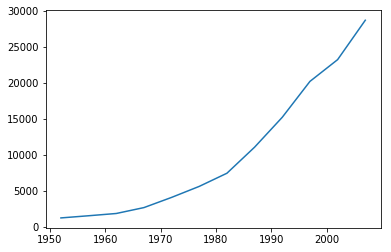

In [0]:
import matplotlib.pyplot as plt

plt.plot(tw["year"].values, tw["gdpPercap"].values)
plt.show()

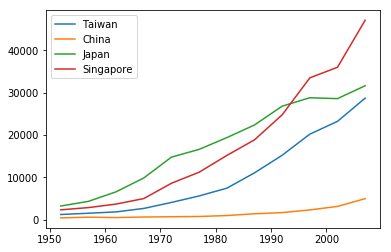

In [0]:
country_list = ["Taiwan", "China", "Japan", "Singapore"]
for country in country_list:
  subset = gapminder[gapminder["country"] == country]
  plt.plot(subset["year"].values, subset["gdpPercap"], label=country)
plt.legend()
plt.show()

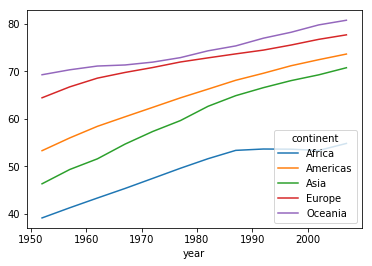

In [0]:
continent_list = gapminder["continent"].unique()
grouped = gapminder.groupby(["year", "continent"])
lifeExp_by_yr_cont = pd.DataFrame(grouped["lifeExp"].mean())
lifeExp_by_yr_cont = lifeExp_by_yr_cont.reset_index()
wide_format = lifeExp_by_yr_cont.pivot(index="year", columns="continent", values="lifeExp")
wide_format.plot.line()
plt.show()

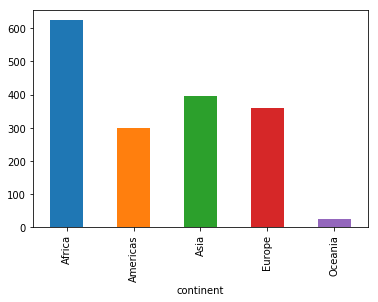

In [0]:
grouped = gapminder.groupby("continent")
n_obs = grouped["country"].count()
n_obs.plot.bar()
plt.show()

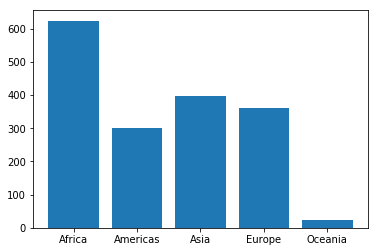

In [0]:
plt.bar(x=range(n_obs.size), height=n_obs.values)
plt.xticks(range(n_obs.size), n_obs.index)
plt.show()

In [0]:
from google.colab import files

files.upload()

Saving STHeiti Light.ttc to STHeiti Light.ttc


KeyboardInterrupt: ignored

In [0]:
!ls

 sample_data  'STHeiti Light.ttc'


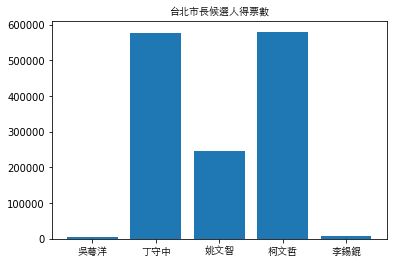

In [0]:
from matplotlib.font_manager import FontProperties

tp = mayors[mayors["admin_area"] == "台北市"]
grouped = tp.groupby(["number", "candidate"])
tp_votes_sum = pd.DataFrame(grouped["votes"].sum()).reset_index()
my_font = FontProperties(fname="STHeiti Light.ttc")
plt.bar(x=range(tp_votes_sum.shape[0]), height=tp_votes_sum["votes"].values)
plt.xticks(range(tp_votes_sum.shape[0]), tp_votes_sum["candidate"].values, fontproperties=my_font)
plt.title("台北市長候選人得票數", fontproperties=my_font)
plt.show()

## Scikit-Learn

<https://scikit-learn.org/stable/>

- 安裝

```bash
pip install sklearn
```

- 載入

```python
from sklearn.MODULE import FUNCTION/CLASS
```

- Scikit-Learn 六大模組：
  - 分類
  - 回歸
  - 聚類
  - 降維
  - 評估
  - 預處理

### Sklearn 內建資料集

- Boston
- Digits

In [0]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)
print(boston.data.shape)
print(boston.target.shape)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.DESCR)
print(digits.data.shape)
print(digits.target.shape)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [0]:
first_digit = digits.data[3, :].reshape(8, 8)
print(first_digit)

[[ 0.  0.  7. 15. 13.  1.  0.  0.]
 [ 0.  8. 13.  6. 15.  4.  0.  0.]
 [ 0.  2.  1. 13. 13.  0.  0.  0.]
 [ 0.  0.  2. 15. 11.  1.  0.  0.]
 [ 0.  0.  0.  1. 12. 12.  1.  0.]
 [ 0.  0.  0.  0.  1. 10.  8.  0.]
 [ 0.  0.  8.  4.  5. 14.  9.  0.]
 [ 0.  0.  7. 13. 13.  9.  0.  0.]]


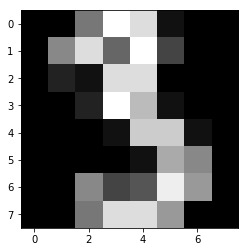

In [0]:
plt.imshow(first_digit, cmap="gray")
plt.show()

In [0]:
print(digits.target[:10])

[0 1 2 3 4 5 6 7 8 9]


## Kaggle

<https://www.kaggle.com/>

- [Competitions](https://www.kaggle.com/competitions)
- [Learn](https://www.kaggle.com/learn)
- [Kernels](https://www.kaggle.com/kernels)

In [0]:
import pandas as pd

mnist_train_url = "https://s3-ap-northeast-1.amazonaws.com/kaggle-getting-started/mnist/train.csv"
mnist_test_url = "https://s3-ap-northeast-1.amazonaws.com/kaggle-getting-started/mnist/test.csv"
titanic_train_url = "https://s3-ap-northeast-1.amazonaws.com/kaggle-getting-started/titanic/train.csv"
titanic_test_url = "https://s3-ap-northeast-1.amazonaws.com/kaggle-getting-started/titanic/test.csv"
house_price_train_url = "https://s3-ap-northeast-1.amazonaws.com/kaggle-getting-started/house-prices/train.csv"
house_price_test_url = "https://s3-ap-northeast-1.amazonaws.com/kaggle-getting-started/house-prices/test.csv"

In [0]:
mnist_train = pd.read_csv(mnist_train_url)
mnist_test = pd.read_csv(mnist_test_url)
print(mnist_train.shape)
print(mnist_test.shape)

(42000, 785)
(28000, 784)


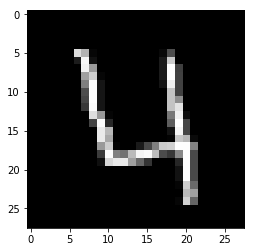

In [0]:
fourth_digit = mnist_train.iloc[3, 1:].values.reshape(28, 28)
plt.imshow(fourth_digit, cmap="gray")
plt.show()

In [0]:
from sklearn.linear_model import LogisticRegression

X_arr = mnist_train.iloc[:1000, 1:].values
y_arr = mnist_train.iloc[:1000, 0].values
#print(X_arr.shape)
#print(y_arr.shape)
lr = LogisticRegression()
lr.fit(X_arr, y_arr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
y_pred = lr.predict(mnist_test.values)

In [0]:
print(y_pred[:10])

[2 0 9 9 2 7 0 3 0 3]


In [0]:
titanic_train = pd.read_csv(titanic_train_url)
titanic_test = pd.read_csv(titanic_test_url)
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [0]:
from sklearn.svm import SVC

X_arr = titanic_train.loc[:, "Pclass"].values.reshape(-1, 1)
y_arr = titanic_train.loc[:, "Survived"].values.reshape(-1, 1)
svc = SVC()
svc.fit(X_arr, y_arr)
y_pred = svc.predict(titanic_test["Pclass"].values.reshape(-1, 1))
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1
 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0
 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0
 1 0 0 0 1 0 0 1 0 0 0]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
